# Solar System Simulation in Matplotlib

### Gravitational Law

According to newton law of gravitation, force between two bodies is given by,

$F = GMm/r^{2}$

`M` and `m` denotes Masses of objects under consideration, `r` denotes the distance between them, `G` denotes gravitational constant.

Consider mass of the `Sun` as `M` and mass of the `Earth` as `m`. Therefore force on earth by sun is given by,

$F_{e} = GMm/r^{2}$


### Newton's Second Law

$F_{e} = ma$

$ a = GM/r^{2}$ 

the acceleration `a` is only related to the mass of the sun and the distance between the `sun` and `earth` r. Now with a known `a`. we can calculate the velocity of the earth after delta time - `dt`

$dv = a * dt$

and the displacement is given by,

$ ds= (v + dv) dt $

lets sum up the above and use matplotlib to simulate the solar system.

 Assume that the sun in position (0,0), earth in position (6,6)

In [8]:
sx , sy = 0,0
ex, ey = 6,6

Distance `r` is given by

In [13]:
rx = ex - sx
ry = ey - sy

let `GMm`, the sun-earth gravity constant be `const`

In [4]:
Ms          = 2.0e30                    # mass of sun in kg unit
Me          = 5.972e24                  # mass of earth in kg unit        
G           = 6.67e-11
const       = G*Ms*Me

The Simulator calculates coordinates for every day. So, let `dt` be one day

In [5]:
sec_per_day = 24.0*60*60
dt     = 1* sec_per_day

In [15]:
mod_r = (rx**2 + ry**2)**1.5  #magnitude of r (2D Space)

Calculating force on earth along x and y axes is given as,

In [16]:
fx = const * rx /mod_r
fy = const * ry/ mod_r

By Newton's Second law in Vector form,

$ \vec{F} = m \vec{a}$

$ \vec{a} = \vec{F} / m $

and

$ d\vec{v} = \vec{a} * dt $

$ d\vec{v} = \vec{F} * dt / m $
 

Velocity vector can now be given as

In [18]:
vx = fx * dt / Me
vy = fy * dt / Me

Earth's new displacement is given as,


In [19]:
sx += vx * dt
sy += vy * dt

In [22]:
G           = 6.67e-11                  # constant G
Ms          = 2.0e30                    # sun
Me          = 5.972e24                  # earth        
AU          = 1.5e11                    # earth sun distance
sec_per_day = 24.0*60*60                # seconds of a day
e_ap_v      = 29290                     # earth velocity at aphelion
const       = G * Me * Ms

# setup the starting conditions of earth

xe, ye, ze  = 1.0167*AU,0,0
vx, vy, vz  = 0,e_ap_v,0

# setup the starting conditions of sun

xs,ys,zs    = 0,0,0
vsx,vsy,vsz = 0,0,0

t           = 0.0
dt          = 1 * sec_per_day   # every frame move this time

#list to store coordinates of sun and earth 

xelist,yelist,zelist = [],[],[]
xslist,yslist,zslist = [],[],[]


#simulation
while t<1*365*sec_per_day:
    
    ## Frame of Reference -> Earth
    
    # compute G 
    rx,ry,rz = xe - xs, ye - ys, ze - zs
    mod_r = (rx**2+ry**2+rz**2)**1.5
    fx = -const*rx/mod_r
    fy = -const*ry/mod_r
    fz = -const*rz/mod_r
    
    # update velocity
    vx += fx * dt / Me
    vy += fy * dt / Me
    vz += fz * dt / Me
    
    # update position
    xe += vx * dt
    ye += vy * dt 
    ze += vz * dt
    
    # save the position in list
    xelist.append(xe)
    yelist.append(ye)
    zelist.append(ze)
    
    ## Frame of Reference - > Sun
    
    # update velocity
    vsx += -fx * dt / Ms
    vsy += -fy * dt / Ms
    vsz += -fz * dt / Ms
    
    # update position
    xs += vsx*dt
    ys += vsy*dt 
    zs += vsz*dt
    
    # save the position in list
    xslist.append(xs)
    yslist.append(ys)
    zslist.append(zs)
    
    # update dt
    t +=dt

# Simulation

<IPython.core.display.Javascript object>


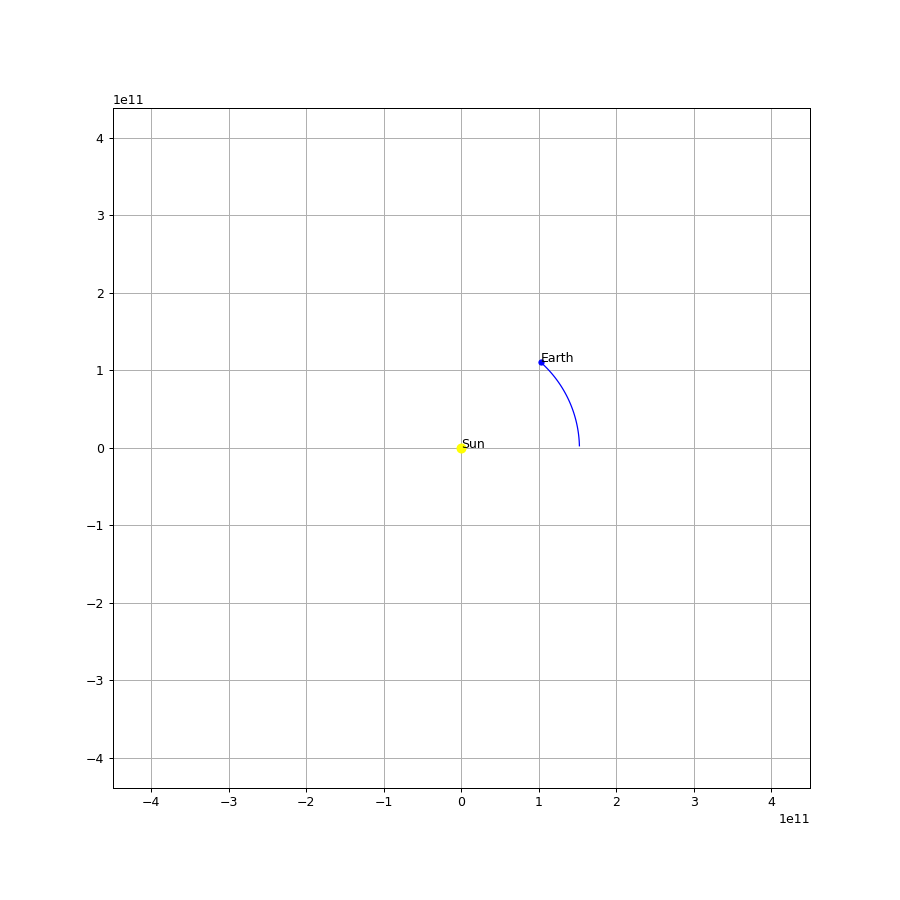

365


In [30]:
import matplotlib.pyplot as plt
from matplotlib import animation

%matplotlib notebook

fig, ax = plt.subplots(figsize=(10,10))
ax.set_aspect('equal')
ax.grid()

line_e,     = ax.plot([],[],lw=1,c='blue')
point_e,    = ax.plot([AU], [0], marker="o"
                      , markersize=4
                      , markeredgecolor="blue"
                      , markerfacecolor="blue")
text_e      = ax.text(AU,0,'Earth')

point_s,    = ax.plot([0], [0], marker="o"
                      , markersize=7
                      , markeredgecolor="yellow"
                      , markerfacecolor="yellow")
text_s      = ax.text(0,0,'Sun')

exdata,eydata = [],[]                   # earth track
sxdata,sydata = [],[]                   # sun track

print(len(xelist))

def update(i):
    exdata.append(xelist[i])
    eydata.append(yelist[i])
    
    line_e.set_data(exdata,eydata)
    point_e.set_data(xelist[i],yelist[i])
    text_e.set_position((xelist[i],yelist[i]))

    point_s.set_data(xslist[i],yslist[i])
    text_s.set_position((xslist[i],yslist[i]))
    ax.axis('equal')
    ax.set_xlim(-3*AU,3*AU)
    ax.set_ylim(-3*AU,3*AU)

    return line_e,point_s,point_e,text_e,text_s

anim = animation.FuncAnimation(fig
                                ,func=update
                                ,frames=len(xelist)
                                ,interval=1
                                ,blit=True)
plt.show()

## Simulation in 3D Space

<IPython.core.display.Javascript object>


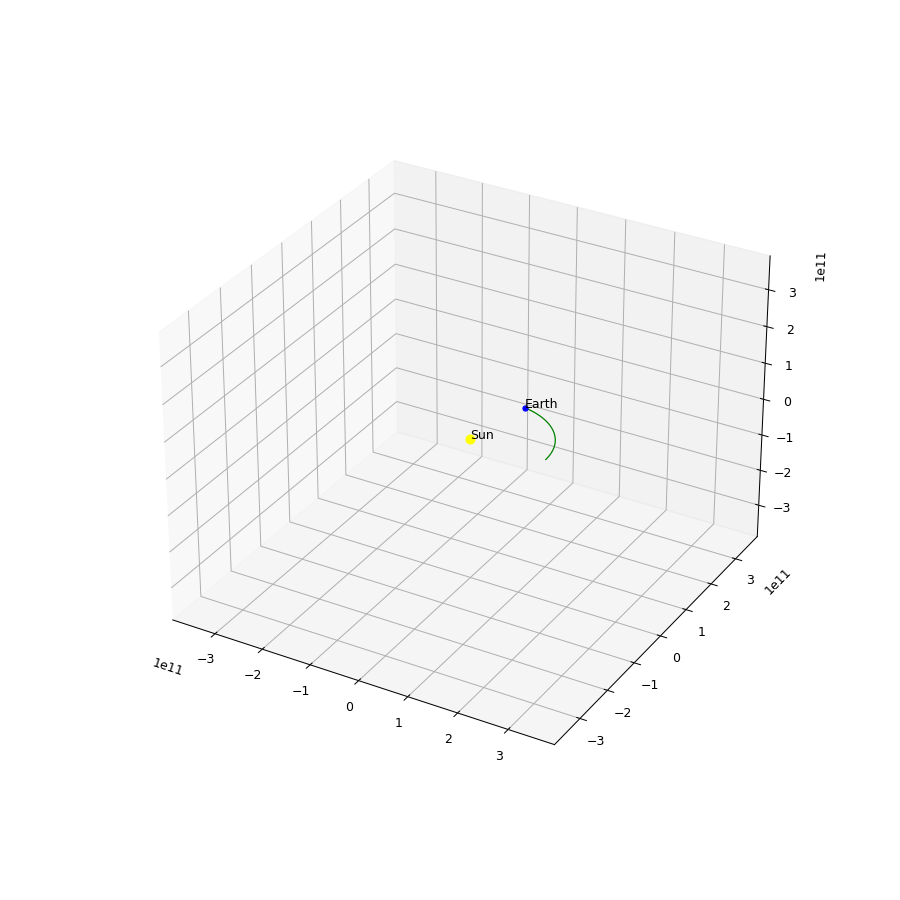

In [31]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import animation

%matplotlib notebook

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.axis('auto')

axis_size = 2.5
ax.set_xlim(-axis_size*AU,axis_size*AU)
ax.set_ylim(-axis_size*AU,axis_size*AU)
ax.set_zlim(-axis_size*AU,axis_size*AU)

# ax.set_aspect('auto')
# ax.grid()
datadict = {}
dataset_s = [xslist,yslist,zslist]
dataset_e = [xelist,yelist,zelist]

datadict['s'] = dataset_s
datadict['e'] = dataset_e


vis_dict = {}
# sun
line_s,     = ax.plot([0],[0],[0],'-g',lw=1)
point_s,    = ax.plot([AU],[0],[0], marker="o", markersize=7, markeredgecolor="yellow", markerfacecolor="yellow")
text_s      = ax.text(AU,0,0,'Sun')
vis_dict['s'] = [line_s,point_s,text_s]

# earth
line_e,     = ax.plot([0],[0],[0],'-g',lw=1)
point_e,    = ax.plot([AU],[0],[0], marker="o", markersize=4, markeredgecolor="blue", markerfacecolor="blue")
text_e      = ax.text(AU,0,0,'Earth')
vis_dict['e'] = [line_e,point_e,text_e]



def update(num,data_dict,vis_dict):
    # sun 
    dataset_s               = data_dict['s']
    line_s,point_s,text_s   = vis_dict['s'][0],vis_dict['s'][1],vis_dict['s'][2]
    line_s.set_data_3d(dataset_s[0][:num],dataset_s[1][:num],dataset_s[2][:num])
    point_s.set_data_3d(dataset_s[0][num],dataset_s[1][num],dataset_s[2][num])
    text_s.set_position((dataset_s[0][num],dataset_s[1][num],dataset_s[2][num]))
    
    # earth 
    dataset_e               = data_dict['e']
    line_e,point_e,text_e   = vis_dict['e'][0],vis_dict['e'][1],vis_dict['e'][2]
    line_e.set_data_3d(dataset_e[0][:num],dataset_e[1][:num],dataset_e[2][:num])
    point_e.set_data_3d(dataset_e[0][num],dataset_e[1][num],dataset_e[2][num])
    text_e.set_position((dataset_e[0][num],dataset_e[1][num],dataset_e[2][num]))
    
    

ani = animation.FuncAnimation(
    fig
    ,update
    ,len(xelist)
    ,fargs=(datadict, vis_dict)
    ,interval=1
)

plt.show()

# What If...??

 How fast would the earth spin if it is heavier than now? 
 
 Does it change the kinematics of the Sun?
 


In [32]:
pwd

'C:\\Users\\THARUN\\Solar System Project'